# Data analysis of the "Classifying dog breeds" experiment


### Table of contents

1. [Project description](#description)
2. [Protocol](#protocol)
3. [Datasets](#datasets)
4. [Helper functions](#helper)
5. [Statistical tests](#tests)
6. [Figures](#figures)

### Project description <a class="anchor" id="description"></a>

Principal Investigator / Contact person: Edgar J. Andrade-Lotero, Universidad del Rosario, Bogota, Colombia,  edgar.andrade@urosario.edu.co

In collaboration with: Robert L. Goldstone, Indiana University, Bloomington, Indiana, USA, rgoldsto@indiana.edu

In collaboration with: Javier Alejandro Velazco Garcia, Universidad del Rosario, Bogota, Colombia, javier.velasco8@gmail.com

In collaboration with: Julián Marcel Ortiz Duque, Independent Scholar, Bogota, Colombia, ortizd.julianUR@gmail.com

Publications using these data:

[1] Andrade-Lotero, E., & Goldstone, R. L., & Ortiz-Duque, J. M., & Velazco-Garcia, J. A. (2021). *The Division of Linguistic Labor as a Form of Cognitive Offloading*. In preparation.

### Protocol <a class="anchor" id="protocol"></a>

A thorough presentation of the *Classifying dog breeds* protocol can be found in the protocols repository https://www.protocols.io/view/classifying-dog-breeds-bvm6n49e. The task was implemented in the nodeGame platform (https://nodegame.org/). The code implementing the game is freely available. The paired condition can be downloaded from https://github.com/Slendercoder/DLL and the solo condition can be downloaded from https://github.com/Slendercoder/DLL_single. In both cases, the interface is in Spanish.


### Datasets <a class="anchor" id="datasets"></a>

Datasets described here:
- performances.csv
- rep-understanding.csv

=======================

Filename: performances.csv

Location: https://github.com/EAndrade-Lotero/SPUoDLL/blob/master/performances.csv

Behavioral data of 20 dyads playing the "Classifying dog breeds" experiment in the paired condition and 44 individuals playing the solo condition (see https://www.protocols.io/edit/classifying-dog-breeds-bvm6n49e). Data was obtained from raw json files output from nodeGame and processed into a single dataframe.

Date of data collection: From 09/16/2019 to 09/23/2019.

Method of data collection: nodeGame platform. Freely available at: https://github.com/Slendercoder/DLL (paired condition; Spanish interface) and at: https://github.com/Slendercoder/DLL_single (solo condition; Spanish interface).

Methods of data processing: Dataset generated from raw data via python scripts to create a single csv from multiple json output from nodeGame.

Number of variables: 17

Number of rows: 20735

Variables:
1. treatment: single or dyad.
2. stage: experiment's stage (training or game).
3. dyad: dyad's name.
4. player: player's id.
5. expert_in: refers to the kind of dog  (terriers or hounds) on which the player trained during training rounds.
6. novice_in: refers to the kind of dog  (terriers or hounds) on which the player did not train during the training rounds.
7. round: round of the respective stage.
8. object: refers to the particular dog, referred to by the image's file name.
9. position: refers to the frame (1,2,...,5) on which this dog's image was shown. 
10. kind: dog's kind.
11. classif: refers to the label the player used to classify the dog.
12. accuracy: whether classification was correct (0=incorrect/1=correct).
13. expert_dog: whether dog is from a breed on which subject received training (true, false or NaN if stage is training round).
14. queried: number of times the player asked partner about dog (NaN if no query was made or if player belongs to treatment==single).
15. answered: proportion of times query was answered by partner.
16. answer_correct: whether partner's answer was correct or not (0=incorrect/1=correct).
17. Yes/No: proportion of 'Yes' answers by partner.

=======================

Filename: rep-understanding.csv

Location: https://github.com/EAndrade-Lotero/SPUoDLL/blob/master/rep-understanding.csv

Self-understanding reports from each participant for each dog breed, obtained at the end of the "Classifying dog breeds" experiment.

Date of data collection: From 09/16/2019 to 09/23/2019.

Method of data collection: nodeGame platform.

Methods of data processing: Dataset generated from raw data via a python script to create a single csv from multiple json output from nodeGame.

Number of variables: 9

Number of rows: 336

Variables:
1. treatment: single or dyad.
2. player: player's id.
3. kind: the dog's kind.
4. expertise: whether the player was trained on this kind of dog or not (experts or novices).
5. report: player's reported understanding score on this kind of dog.
6. accuracy: mean accuracy over game rounds on this kind of dog.
7. query: proportion of times the player queried their partner on this kind of dog.
8. answered: proportion of times queries on this kind of dog were answered by partner.
9. player_responded: proportion of times player responded to queries on this kind of dog.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import numpy as np
#from statsmodels.formula.api import ols
from scipy import stats
import scipy.stats.distributions as dist

In [3]:
data = pd.read_csv('performances.csv')
data.shape

(20735, 17)

In [4]:
data.head()

,treatment,stage,dyad,player,expert_in,novice_in,round,object,position,kind,classif,accuracy,expert_dog,queried,answer_correct,answered,yes/no
0,solo,Training rounds,32519-32519,325192931513079,terrier,hound,1,C11.jpg,frame1,C,C,1,True,NaN,NaN,NaN,NaN
1,solo,Training rounds,32519-32519,325192931513079,terrier,hound,1,A1.jpg,frame2,A,C,0,True,NaN,NaN,NaN,NaN
2,solo,Training rounds,32519-32519,325192931513079,terrier,hound,1,A7.jpg,frame3,A,A,1,True,NaN,NaN,NaN,NaN
3,solo,Training rounds,32519-32519,325192931513079,terrier,hound,1,A6.jpg,frame4,A,A,1,True,NaN,NaN,NaN,NaN
4,solo,Training rounds,32519-32519,325192931513079,terrier,hound,1,A5.jpg,frame5,A,A,1,True,NaN,NaN,NaN,NaN


In [5]:
report_understanding = pd.read_csv('rep-understanding.csv')
report_understanding.shape

(336, 9)

In [6]:
report_understanding.head()

,treatment,player,kind,expertise,report,accuracy,queried,answered,player_responded
0,paired,21409433577947,A,experts,7.0,0.931034,0.022472,0.750000,0.941176
1,paired,21409433577947,B,novices,7.0,0.828571,0.628571,0.954545,NaN
2,paired,21409433577947,C,experts,1.0,0.100000,0.011111,1.000000,0.888889
3,paired,21409433577947,D,novices,7.0,0.571429,0.666667,1.000000,NaN
4,paired,32111755046981,A,novices,5.0,0.678571,0.107143,0.666667,NaN


---

### Helper functions <a class="anchor" id="helper"></a>


In [7]:
def filter_variables(df, dict_variables) :
    inicial = True
    for key in dict_variables.keys() :
        if type(dict_variables[key]) == str:
            if inicial :
                filtro = f"({key}\'{dict_variables[key]}\')"
                inicial = False
            else:
                filtro = filtro + f" and ({key}\'{dict_variables[key]}\')"
        else:
            if inicial :
                filtro = f"({key}{dict_variables[key]})"
                inicial = False
            else:
                filtro = filtro + f" and ({key}{dict_variables[key]})"

    return pd.DataFrame(df.query(filtro))

def test_difference_proportions_accuracy(df, variable:str):
    treatments = df[variable].unique().tolist()
    assert(len(treatments) == 2)
    treatment1 = treatments[0]
    treatment2 = treatments[1]
    total_proportion_accuracy = df['accuracy'].mean()
    prop = df.groupby(variable)["accuracy"].agg([lambda z: np.mean(z==1), "size"])
    prop.columns = ['proportions_accuracy','total_counts']
    variance = total_proportion_accuracy * (1 - total_proportion_accuracy)
    standard_error = np.sqrt(variance * (1 / prop.total_counts[treatment1] + 1 / prop.total_counts[treatment2]))
    best_estimate = (prop.proportions_accuracy[treatment1] - prop.proportions_accuracy[treatment2])
    hypothesized_estimate = 0
    Z = (best_estimate-hypothesized_estimate) / standard_error
    P = 2*dist.norm.cdf(-np.abs(Z)) # Multiplied by two indicates a two tailed testing.
    return Z, P 

----

### Statistical tests <a class="anchor" id="tests"></a>


Comparison of proportions of classification accuracy. We consider five comparisons: 

* Single vs. Dyad treatments during training rounds; 
* Single vs. Dyad treatments during the last two training rounds;
* Classification accuracy of expert dogs in Single vs. Dyad treatments during game rounds; 
* Classification accuracy of novice dogs in Single vs. Dyad treatments during game rounds.
* Classification accuracy of novice dogs vs. player queried or not.

**Test 1:**

*Single vs. Dyad treatments during training rounds*

In [15]:
df_training = filter_variables(data, {
    'stage==':'Training rounds'
})

pd.crosstab(df_training['accuracy'], df_training['treatment'])

treatment,dyad,single
accuracy,,
0,385,633
1,4510,4822


In [16]:
pd.crosstab(df_training['accuracy'], df_training['treatment']).apply(lambda r:r/r.sum(),axis=0)

treatment,dyad,single
accuracy,,
0,0.078652,0.11604
1,0.921348,0.88396


In [17]:
Z, P = test_difference_proportions_accuracy(df_training, 'treatment') # Multiplied by two indicates a two tailed testing.
print('Statistics=%.3f, p=%.3f' % (Z, P))
if P < 0.05:
    print('Reject H0: proportions are not equal.')
else:
    print('Cannot reject H0: proportions are equal.')

Statistics=-6.377, p=0.000
Reject H0: proportions are not equal.


**Result:** The evidence suggests rejection of H0. Proportion of accuracy for PAIRED and SOLO conditions during training rounds are not equal (Z=-6.377, p=.000).

In [26]:
training_dyads = filter_variables(df_training, {
    'stage==':'Training rounds',
    'treatment==':'dyad'
})
training_solo = filter_variables(df_training, {
    'stage==':'Training rounds',
    'treatment==':'single'
})

In [27]:
stat, p = stats.ttest_ind(training_dyads['accuracy'],training_solo['accuracy'],)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Reject H0: means are not equal.')
else:
    print('Cannot reject H0: means are equal.')

Statistics=6.389, p=0.000
Reject H0: means are not equal.


**Test 2:**

*Single vs. Dyad treatments during last two training rounds*

In [14]:
df_training = filter_variables(data, {
    'stage==':'Training rounds',
    'round>':23
})

pd.crosstab(df_training['accuracy'], df_training['treatment'])

treatment,dyad,single
accuracy,,
0,11,20
1,389,420


In [15]:
pd.crosstab(df_training['accuracy'], df_training['treatment']).apply(lambda r:r/r.sum(),axis=0)

treatment,dyad,single
accuracy,,
0,0.0275,0.045455
1,0.9725,0.954545


In [16]:
Z, P = test_difference_proportions_accuracy(df_training, 'treatment') # Multiplied by two indicates a two tailed testing.
print('Statistics=%.3f, p=%.3f' % (Z, P))
if P < 0.05:
    print('Reject H0: proportions are not equal.')
else:
    print('Cannot reject H0: proportions are equal.')

Statistics=-1.379, p=0.168
Cannot reject H0: proportions are equal.


**Result:** Not enough evidence to reject H0. Proportion of accuracy for PAIRED and SOLO conditions in the last 2 training rounds are equal (Z=-1.379, p=.168).

**Test 3:**

*Classification accuracy of expert dogs in Single vs. Dyad treatments during game rounds*

In [17]:
df_game = filter_variables(data, {
    'stage==':'Game rounds',
    'expert_dog==':True
})

pd.crosstab(df_game['accuracy'], df_game['treatment'])

treatment,dyad,single
accuracy,,
0,108,126
1,2341,2614


In [18]:
pd.crosstab(df_game['accuracy'], df_game['treatment']).apply(lambda r:r/r.sum(),axis=0)

treatment,dyad,single
accuracy,,
0,0.0441,0.045985
1,0.9559,0.954015


In [19]:
Z, P = test_difference_proportions_accuracy(df_game, 'treatment') # Multiplied by two indicates a two tailed testing.
print('Statistics=%.3f, p=%.3f' % (Z, P))
if P < 0.05:
    print('Reject H0: proportions are not equal.')
else:
    print('Cannot reject H0: proportions are equal.')

Statistics=-0.327, p=0.744
Cannot reject H0: proportions are equal.


**Result:** Not enough evidence to reject H0. Proportion of expert dog classification accuracy for PAIRED and SOLO conditions are equal (Z=-0.327, p=.744).

**Test 4:**

*Classification accuracy of novice dogs in Single vs. Dyad treatments during game rounds*

In [20]:
df_game = filter_variables(data, {
    'stage==':'Game rounds',
    'expert_dog==':False
})

pd.crosstab(df_game['accuracy'], df_game['treatment'])

treatment,dyad,single
accuracy,,
0,429,561
1,2007,2199


In [21]:
pd.crosstab(df_game['accuracy'], df_game['treatment']).apply(lambda r:r/r.sum(),axis=0)

treatment,dyad,single
accuracy,,
0,0.176108,0.203261
1,0.823892,0.796739


In [22]:
Z, P = test_difference_proportions_accuracy(df_game, 'treatment') # Multiplied by two indicates a two tailed testing.
print('Statistics=%.3f, p=%.3f' % (Z, P))
if P < 0.05:
    print('Reject H0: proportions are not equal.')
else:
    print('Cannot reject H0: proportions are equal.')

Statistics=-2.487, p=0.013
Reject H0: proportions are not equal.


**Result:** Evidence suggests rejecting H0. Proportion of novice dog classification accuracy for PAIRED and SOLO conditions are not equal (Z=-2.487, p=.013).

**Test 5:**

*Classification accuracy of novice dogs vs. player queried or not*

In [27]:
df_game = filter_variables(data, {
    'treatment==':'dyad',
    'stage==':'Game rounds',
    'expert_dog==':False
})
df_game['queried'] = df_game['queried'].apply(lambda x: 1 if x > 0 else 0)
pd.crosstab(df_game['accuracy'], df_game['queried'])

queried,0,1
accuracy,,
0,318,111
1,1173,834


In [28]:
pd.crosstab(df_game['accuracy'], df_game['queried']).apply(lambda r:r/r.sum(),axis=0)

queried,0,1
accuracy,,
0,0.21328,0.11746
1,0.78672,0.88254


In [29]:
Z, P = test_difference_proportions_accuracy(df_game, 'queried') # Multiplied by two indicates a two tailed testing.
print('Statistics=%.3f, p=%.3f' % (Z, P))
if P < 0.05:
    print('Reject H0: proportions are not equal.')
else:
    print('Cannot reject H0: proportions are equal.')

Statistics=-6.050, p=0.000
Reject H0: proportions are not equal.


**Result:** Evidence suggests rejecting H0. Proportion of novice dog classification accuracy for PAIRED and SOLO conditions are not equal (Z=-2.487, p=.013).

---

In [48]:
game_dyad = filter_variables(data, {
    'treatment==':'dyad', 
    'stage==':'Game rounds',
    'expert_dog==':False,
    'round<': 30
})
game_dyad['num_queries'] = game_dyad['queried'].apply(lambda x: x if x>0 else 0)
game_dyad['queried'] = game_dyad['queried'].apply(lambda x: 1 if x>0 else 0)
game_dyad['answer'] = game_dyad['answered'].apply(lambda x: 1 if x>0 else 0)
game_dyad['accuracy_external'] = game_dyad[['accuracy', 'queried']].apply(lambda x: 1 if ((x['queried']==1) & (x['accuracy']==1)) else 0, axis=1)
game_dyad['accuracy_internal'] = game_dyad[['accuracy', 'queried']].apply(lambda x: 1 if ((x['queried']==0) & (x['accuracy']==1)) else 0, axis=1)

df_use = game_dyad.groupby(['player', 'round']).agg({
    'num_queries':'sum',
    'queried':'mean',
    'yes/no':'mean',
    'accuracy':'mean',
    'accuracy_external':'mean',
    'accuracy_internal':'mean'
}).reset_index()
#df_use.columns = df_use.columns.get_level_values(0)
#df_use.columns = ['player', 'round', 'num_queries', 'queried', 'yes/no', 'accuracy']
df_use['new_use'] = df_use.groupby('player')['queried'].transform('shift',-1)
df_use.sort_values(by=['player', 'round'], inplace=True)
df_use['acc_accuracy'] = df_use.groupby('player')['accuracy'].cumsum()
df_use['acc_queried'] = df_use.groupby('player')['queried'].cumsum()
df_use['acc_internal'] = df_use.groupby('player')['accuracy_internal'].cumsum()
df_use['acc_external'] = df_use.groupby('player')['accuracy_external'].cumsum()
df_use.dropna()
df_use.head()

,player,round,num_queries,queried,yes/no,accuracy,accuracy_external,accuracy_internal,new_use,acc_accuracy,acc_queried,acc_internal,acc_external
0,21409433577947,3,2.0,0.333333,0.500000,0.000000,0.000000,0.0,0.333333,0.000000,0.333333,0.0,0.000000
1,21409433577947,4,2.0,0.333333,0.500000,0.333333,0.333333,0.0,0.333333,0.333333,0.666667,0.0,0.333333
2,21409433577947,5,3.0,0.333333,0.000000,0.333333,0.333333,0.0,0.500000,0.666667,1.000000,0.0,0.666667
3,21409433577947,6,4.0,0.500000,0.166667,1.000000,0.500000,0.5,1.000000,1.666667,1.500000,0.5,1.166667
4,21409433577947,7,3.0,1.000000,0.333333,1.000000,1.000000,0.0,0.666667,2.666667,2.500000,0.5,2.166667


In [45]:
mod = smf.ols(formula='new_use ~  queried + acc_precision_individual + acc_accuracy_queried', data=df_use)
res = mod.fit()
print(res.summary())

NameError: name 'smf' is not defined

---

**Test 6:** Self-report of understanding compared between paired and solo conditions.

In [33]:
report_dyads = filter_variables(report_understanding, {
    'treatment==':'dyad', 
    'expertise==':'experts'}
                                 )[['player','report']]
print("="*10+"PAIRED condition"+"="*10)
print('Accuracy mean:', report_dyads['report'].mean())
print('Accuracy standard deviation:', report_dyads['report'].std())
print('Number of data points:', report_dyads['report'].count())
print('Lost 1 player observation due to error in saving data in nodeGame')

print("")

report_solo = filter_variables(report_understanding, {
    'treatment==':'single', 
    'expertise==':'experts'}
                                 )[['player','report']]
print("="*10+"SOLO condition"+"="*10)
print('Accuracy mean:', report_solo['report'].mean())
print('Accuracy standard deviation:', report_solo['report'].std())
print('Number of data points:', report_solo['report'].count())



==========PAIRED condition==========
Accuracy mean: 6.217948717948718
Accuracy standard deviation: 1.1124728030813775
Number of data points: 78
Lost 1 player observation due to error in saving data in nodeGame

==========SOLO condition==========
Accuracy mean: 5.318181818181818
Accuracy standard deviation: 1.3090792986829847
Number of data points: 88


In [34]:
stat, p = stats.ttest_ind(report_dyads['report'],report_solo['report'],)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Reject H0: means are not equal.')
else:
    print('Cannot reject H0: means are equal.')

Statistics=4.740, p=0.000
Reject H0: means are not equal.


c:\users\edgar.andrade\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\edgar.andrade\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\edgar.andrade\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instea

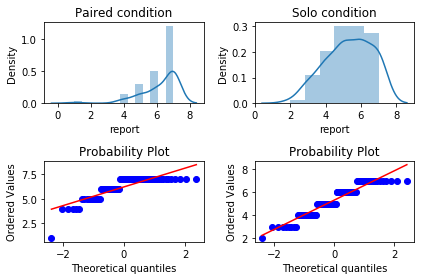

In [35]:
fig,ax = plt.subplots(2,2)
ax[0,0].set_title("Paired condition")
ax[0,1].set_title("Solo condition")
sns.distplot(report_dyads['report'], ax=ax[0,0])
sns.distplot(report_solo['report'], ax=ax[0,1])
stats.probplot(report_dyads['report'], dist="norm", plot=ax[1,0])
stats.probplot(report_solo['report'], dist="norm", plot=ax[1,1])
plt.tight_layout()

In [36]:
stat, p = stats.shapiro(report_dyads['report'])
print('Normality test for accuracy in PAIRED condition')
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Sample is not Gaussian')
else:
    print('Sample is Gaussian')

stat, p = stats.shapiro(report_solo['report'])
print('Normality test for accuracy in SOLO condition')
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Sample is not Gaussian')
else:
    print('Sample is Gaussian')

Normality test for accuracy in PAIRED condition
Statistics=0.717, p=0.000
Sample is not Gaussian
Normality test for accuracy in SOLO condition
Statistics=0.909, p=0.000
Sample is not Gaussian


In [37]:
stat, p = stats.mannwhitneyu(
    report_dyads['report'], 
    report_solo['report']
)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=2016.500, p=0.000


**Result of test 6:** Paired participants reported on average a greater understanding of their expert dogs than solo participants ($\mbox{M}_{\mbox{paired experts}}\,{=}\,6.22$, $\mbox{SD}_{\mbox{paired experts}}\,{=}\,1.11$, $\mbox{M}_{\mbox{solo experts}}\,{=}\,5.32$, $\mbox{SD}_{\mbox{solo experts}}\,{=}\,1.31$, $\mbox{t}(164)\,{=}\,4.74$, $\mbox{p}\,{<}\,.001$, note: non-parametric U test agrees with t-test).

---

**Test 7:** Correlation between *expert* accuracy and report, per condition.

As it turns out, there is a player who, albeit being an expert, reported a very low understanding and very low accuracy for one of their expert dog breeds. We will treat this data point as an outlier and will leave it out of the present analysis. Here is a visual presentation of such an outlier.

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


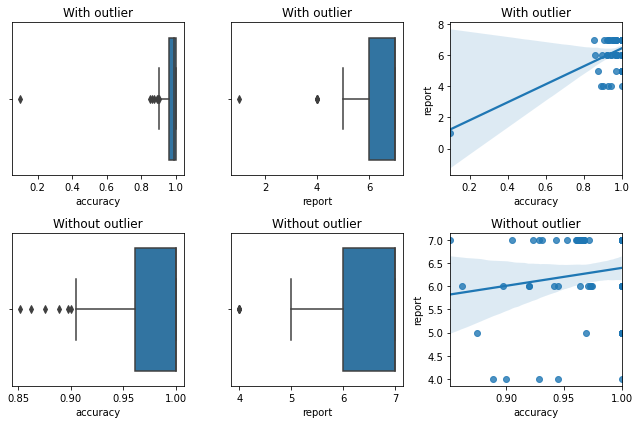

In [10]:
report_understanding = pd.read_csv('rep-understanding.csv')
report_dyads = filter_variables(report_understanding, {
    'treatment==':'paired', 
    'expertise==':'experts'}
                                 )[['player','report','accuracy']]
fig, ax = plt.subplots(2,3,figsize=(9,6))
sns.boxplot(report_dyads['accuracy'], ax=ax[0,0])
sns.boxplot(report_dyads['report'], ax=ax[0,1])
sns.regplot(x='accuracy', y='report', data=report_dyads, ax=ax[0,2])
ax[0,0].set_title("With outlier")
ax[0,1].set_title("With outlier")
ax[0,2].set_title("With outlier")

report_dyads = report_dyads[report_dyads['accuracy']>0.25]

sns.boxplot(report_dyads['accuracy'], ax=ax[1,0])
sns.boxplot(report_dyads['report'], ax=ax[1,1])
sns.regplot(x='accuracy', y='report', data=report_dyads, ax=ax[1,2])
ax[1,0].set_title("Without outlier")
ax[1,1].set_title("Without outlier")
ax[1,2].set_title("Without outlier")

plt.tight_layout()


In [39]:
report_dyads = filter_variables(report_understanding, {
    'treatment==':'dyad', 
    'expertise==':'experts'}
                                 )[['player','report','accuracy']]
report_dyads = report_dyads[report_dyads['accuracy']>0.25]

print("/"*20 + "No outlier" + "/"*20)
print("="*10+"PAIRED EXPERTS"+"="*10)
print("Mean accuracy:", report_dyads['accuracy'].mean())
print("Mean report:", report_dyads['report'].mean())
r, p = stats.pearsonr(report_dyads['accuracy'],report_dyads['report'])
print("Pearson correlation accuracy vs. report:", r)
print("Significance:", p)
print("Number of data points:", report_dyads.shape[0])

print("")

report_solo = filter_variables(report_understanding, {
    'treatment==':'single', 
    'expertise==':'experts'}
                                 )[['player','report','accuracy']]
print("="*10+"SOLO EXPERTS"+"="*10)
print("Mean accuracy:", report_solo['accuracy'].mean())
print("Mean report:", report_solo['report'].mean())
r, p = stats.pearsonr(report_solo['accuracy'],report_solo['report'])
print("Pearson correlation accuracy vs. report:", r)
print("Significance:", p)
print("Number of data points:", report_solo.shape[0])

print("")
print("/"*20 + "With outlier" + "/"*20)

report_dyads = filter_variables(report_understanding, {
    'treatment==':'dyad', 
    'expertise==':'experts'}
                                 )[['player','report','accuracy']]

print("="*10+"PAIRED EXPERTS"+"="*10)
print("Mean accuracy:", report_dyads['accuracy'].mean())
print("Mean report:", report_dyads['report'].mean())
r, p = stats.pearsonr(report_dyads['accuracy'],report_dyads['report'])
print("Pearson correlation accuracy vs. report:", r)
print("Significance:", p)
print("Number of data points:", report_dyads.shape[0])

print("")

report_solo = filter_variables(report_understanding, {
    'treatment==':'single', 
    'expertise==':'experts'}
                                 )[['player','report','accuracy']]
print("="*10+"SOLO EXPERTS"+"="*10)
print("Mean accuracy:", report_solo['accuracy'].mean())
print("Mean report:", report_solo['report'].mean())
r, p = stats.pearsonr(report_solo['accuracy'],report_solo['report'])
print("Pearson correlation accuracy vs. report:", r)
print("Significance:", p)
print("Number of data points:", report_solo.shape[0])

////////////////////No outlier////////////////////
==========PAIRED EXPERTS==========
Mean accuracy: 0.9713775372631759
Mean report: 6.285714285714286
Pearson correlation accuracy vs. report: 0.15330026227343127
Significance: 0.18316109288082413
Number of data points: 77

==========SOLO EXPERTS==========
Mean accuracy: 0.9533899636180259
Mean report: 5.318181818181818
Pearson correlation accuracy vs. report: 0.30309361663751927
Significance: 0.0040986878971194666
Number of data points: 88

////////////////////With outlier////////////////////
==========PAIRED EXPERTS==========
Mean accuracy: 0.9602060303751865
Mean report: 6.217948717948718
Pearson correlation accuracy vs. report: 0.5489932886114601
Significance: 1.946658720517271e-07
Number of data points: 78

==========SOLO EXPERTS==========
Mean accuracy: 0.9533899636180259
Mean report: 5.318181818181818
Pearson correlation accuracy vs. report: 0.30309361663751927
Significance: 0.0040986878971194666
Number of data points: 88


Text(0.5, 1.0, 'Single')

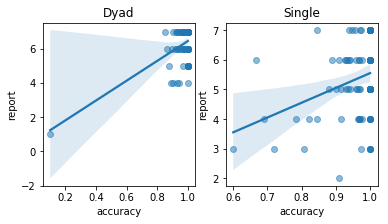

In [40]:
fig, ax = plt.subplots(1,2,figsize=(6,3))
sns.regplot(x='accuracy', y='report', data=report_dyads, scatter_kws={'alpha':0.5}, ax=ax[0])
sns.regplot(x='accuracy', y='report', data=report_solo, scatter_kws={'alpha':0.5}, ax=ax[1])
ax[0].set_title('Dyad')
ax[1].set_title('Single')

**Result of test 5:** Accuracy does not make a significant contribution to the report for dyadic experts ($\mbox{r}(75)\,{=}\,.15$, $\mbox{p}\,{=}\,.18$) as compared to a significant influence in the solo condition ($\mbox{r}(86)\,{=}\,.3$, $\mbox{p}\,{<}\,.01$).

---

**Test 6:** Correlation between *expert* response rate to novices' question vs. report.

In [41]:
df_expertos_parejas = filter_variables(report_understanding, {
    'treatment==':'dyad', 
    'expertise==':'experts'}
                                 )[['player','report','accuracy','player_responded']]
df_expertos_parejas = df_expertos_parejas[df_expertos_parejas['accuracy']>0.2]
df_expertos_parejas = df_expertos_parejas[df_expertos_parejas['player_responded'].isna()==False]

print("/"*20 + "No outlier" + "/"*20)
print("="*10+"PAIRED EXPERTS"+"="*10)
print("Mean accuracy:", df_expertos_parejas['player_responded'].mean())
print("Mean report:", df_expertos_parejas['report'].mean())
r, p = stats.pearsonr(df_expertos_parejas['player_responded'],df_expertos_parejas['report'])
print("Pearson correlation player_responded vs. report:", r)
print("Significance:", p)
print("Number of data points:", df_expertos_parejas.shape[0])

print(" ")

df_expertos_parejas = filter_variables(report_understanding, {
    'treatment==':'dyad', 
    'expertise==':'experts'}
                                 )[['player','report','accuracy','player_responded']]
df_expertos_parejas = df_expertos_parejas[df_expertos_parejas['player_responded'].isna()==False]

print("/"*20 + "Keep outlier" + "/"*20)
print("="*10+"PAIRED EXPERTS"+"="*10)
print("Mean accuracy:", df_expertos_parejas['player_responded'].mean())
print("Mean report:", df_expertos_parejas['report'].mean())
r, p = stats.pearsonr(df_expertos_parejas['player_responded'],df_expertos_parejas['report'])
print("Pearson correlation player_responded vs. report:", r)
print("Significance:", p)
print("Number of data points:", df_expertos_parejas.shape[0])

////////////////////No outlier////////////////////
==========PAIRED EXPERTS==========
Mean accuracy: 0.9014044475554871
Mean report: 6.2615384615384615
Pearson correlation player_responded vs. report: 0.2506858224483809
Significance: 0.0439922519882274
Number of data points: 65
 
////////////////////Keep outlier////////////////////
==========PAIRED EXPERTS==========
Mean accuracy: 0.9012148178787205
Mean report: 6.181818181818182
Pearson correlation player_responded vs. report: 0.2123148263254182
Significance: 0.08699443931757916
Number of data points: 66


**Results of test 6:** The expert's response rate to the novice's questions commands a positive correlation with the report of understanding ($\mbox{r}(63)\,{=}\,.25$, $\mbox{p}\,{=}\,.044$).

---

**Test 7:** Descriptive statistics novices' report of understanding.

In [ ]:
report_dyads = filter_variables(report_understanding, {
    'treatment==':'dyad', 
    'expertise==':'novices'}
                                 )[['player','report']]

print("="*10+"PAIRED NOVICES"+"="*10)
print("Mean report:", report_dyads['report'].mean())
print("Standard deviation report:", report_dyads['report'].std())
print("Number of data points:", report_dyads.shape[0])

print("")

report_solo = filter_variables(report_understanding, {
    'treatment==':'single', 
    'expertise==':'novices'}
                                 )[['player','report']]
print("Mean report:", report_solo['report'].mean())
print("Standard deviation report:", report_solo['report'].std())
print("Number of data points:", report_solo.shape[0])


In [ ]:
stat, p = stats.ttest_ind(report_dyads['report'],report_solo['report'],)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Reject H0: means are not equal.')
else:
    print('Cannot reject H0: means are equal.')

In [ ]:
fig,ax = plt.subplots(2,2)
ax[0,0].set_title("Paired condition")
ax[0,1].set_title("Solo condition")
sns.distplot(report_dyads['report'], ax=ax[0,0])
sns.distplot(report_solo['report'], ax=ax[0,1])
stats.probplot(report_dyads['report'], dist="norm", plot=ax[1,0])
stats.probplot(report_solo['report'], dist="norm", plot=ax[1,1])
plt.tight_layout()

In [ ]:
stat, p = stats.shapiro(report_dyads['report'])
print('Normality test for accuracy in PAIRED condition')
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Sample is not Gaussian')
else:
    print('Sample is Gaussian')

stat, p = stats.shapiro(report_solo['report'])
print('Normality test for accuracy in SOLO condition')
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Sample is not Gaussian')
else:
    print('Sample is Gaussian')

In [ ]:
stat, p = stats.mannwhitneyu(
    report_dyads['report'], 
    report_solo['report']
)
print('Statistics=%.3f, p=%.3f' % (stat, p))

---

**Test 8:** Correlation of *novice* accuracy and report, per condition.

In [ ]:
report_dyads = filter_variables(report_understanding, {
    'treatment==':'dyad', 
    'expertise==':'novices'}
                                 )[['player','report','accuracy']]
print("="*10+"PAIRED NOVICES"+"="*10)
print("Mean accuracy:", report_dyads['accuracy'].mean())
print("Mean report:", report_dyads['report'].mean())
r, p = stats.pearsonr(report_dyads['accuracy'],report_dyads['report'])
print("Pearson correlation accuracy vs. report:", r)
print("Significance:", p)
print("Number of data points:", report_dyads.shape[0])

print("")

report_solo = filter_variables(report_understanding, {
    'treatment==':'single', 
    'expertise==':'novices'}
                                 )[['player','report','accuracy']]
print("="*10+"SOLO NOVICES"+"="*10)
print("Mean accuracy:", report_solo['accuracy'].mean())
print("Mean report:", report_solo['report'].mean())
r, p = stats.pearsonr(report_solo['accuracy'],report_solo['report'])
print("Pearson correlation accuracy vs. report:", r)
print("Significance:", p)
print("Number of data points:", report_solo.shape[0])


**Result of test 8:** For solo novices, the report is highly correlated with accuracy ($\mbox{r}(88)\,{=}\,.26$, $\mbox{p}\,{=}\,.01$). But for paired novices the correlation is very low and not statistically significant ($\mbox{r}(76)\,{=}\,.07$, $\mbox{p}\,{=}\,.54$).

---

**Test 9:** Correlation between report with and rate of queries answered by expert partner.

In [ ]:
report_dyads = filter_variables(report_understanding, {
    'treatment==':'dyad', 
    'expertise==':'novices'}
                                 )[['player','report','accuracy','queried','answered']]
report_dyads = report_dyads[report_dyads['answered'].isna()==False]
print("="*10+"PAIRED NOVICES"+"="*10)
print("Mean accuracy:", report_dyads['answered'].mean())
print("Mean report:", report_dyads['report'].mean())
r, p = stats.pearsonr(report_dyads['answered'],report_dyads['report'])
print("Pearson correlation answered vs. report:", r)
print("Significance:", p)
print("Number of data points:", report_dyads.shape[0])

**Result test 9:** There is an inverse correlation between the report of understanding with respect to the rate of response to the queries by the expert partner ($\mbox{r}(65)\,{=}\,-.27$, $\mbox{p}\,{=}\,.028$).

---